## 调库

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/Songti.ttc")
    #?fname后是字体的位置

## 创建数据集

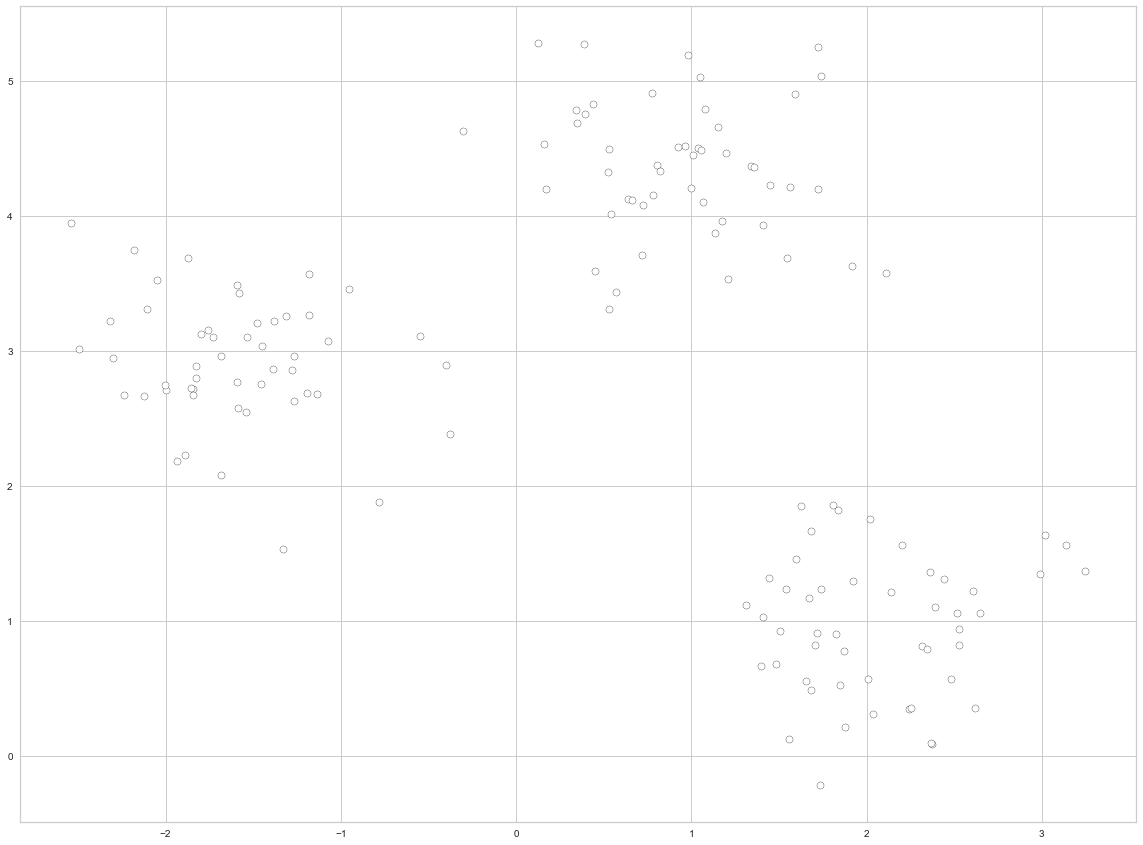

In [35]:
x,y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
plt.figure(figsize=(20,15))
plt.scatter(x[:,0],x[:,1],c='white',marker='o',edgecolors='black',s=50)
plt.show()

#### 生成数据集
> x,y=make_blobs(n_samples=100 , n_features=2 , centers=2 , random_state=2 , cluster_std=1.5)
- n_features:表示每一个样本有多少特征值
- n_samples:表示样本的个数
- centers:是聚类中心点的个数，可以理解为label的种类数
- random_state:是随机种子，可以固定生成的数据
- cluster_std:设置每个类别的方差
#### 散点图
- c：点的颜色
- marker：点的形状
- edgecolor：点边缘的形状
- s：点的大小

## 肘部法则

Elbow Method确定合适的簇数:


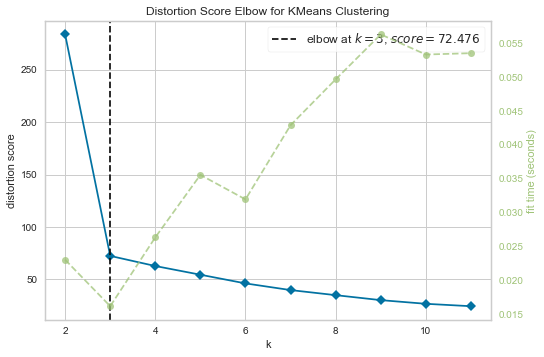

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# 用肘部方法找到合适的簇数
print('Elbow Method确定合适的簇数:')
Elbow_M = KElbowVisualizer(KMeans(), k=11)
Elbow_M.fit(x)
Elbow_M.show()

## 定义模型

In [37]:
model = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
y_pred = model.fit_predict(x)

#### KMeans中的参数
- n_clusters: 即我们的k值，一般需要多试一些值以获得较好的聚类效果
- max_iter： 最大的迭代次数，一般如果是凸数据集的话可以不管这个值，如果数据集不是凸的，可能很难收敛，此时可以指定最大的迭代次数让算法可以及时退出循环
- n_init：用不同的初始化质心运行算法的次数。由于K-Means是结果受初始值影响的局部最优的迭代算法，因此需要多跑几次以选择一个较好的聚类效果，默认是10，一般不需要改。如果你的k值较大，则可以适当增大这个值。
- init： 即初始值选择的方式，可以为完全随机选择’random’,优化过的’k-means++‘或者自己指定初始化的k个质心。一般建议使用默认的’k-means++’
- algorithm：有“auto”, “full” or “elkan”三种选择。“full"就是我们传统的K-Means算法， “elkan”是elkan K-Means算法。默认的"auto"则会根据数据值是否是稀疏的，来决定如何选择"full"和“elkan”。一般数据是稠密的，那么就是 “elkan”，否则就是"full”。一般来说建议直接用默认的"auto"

## 绘制预测出来的2个簇

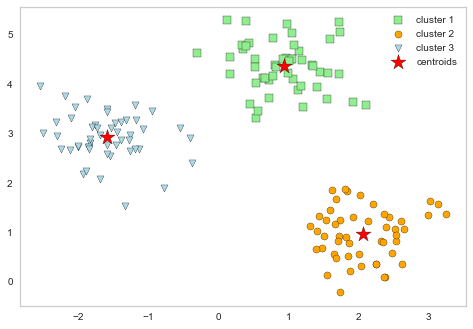

In [38]:
plt.scatter(
    x[y_pred == 0, 0], x[y_pred == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_pred == 1, 0], x[y_pred == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    x[y_pred == 2, 0], x[y_pred == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#! 画出聚类中心
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## 碎石图

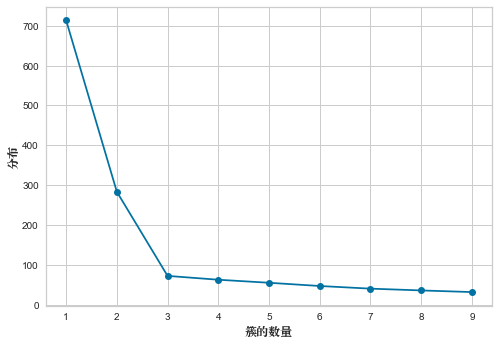

In [39]:
distortions = []
for i in range(1, 10):
    model = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    model.fit(x)
    distortions.append(model.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('簇的数量',fontproperties=my_font)
plt.ylabel('分布',fontproperties=my_font)
plt.show()

In [40]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=10,
                      n_init=10, max_no_improvement=10, verbose=0)
y_pred_1 = mbk.fit_predict(x)

## MiniBatchKMeans的参数
- random_state: 随机生成簇中心的状态条件,譬如设置random_state = 9
- tol: 容忍度，即kmeans运行准则收敛的条件
- max_no_improvement：即连续多少个Mini Batch没有改善聚类效果的话，就停止算法， 和reassignment_ratio， max_iter一样是为了控制算法运行时间的。默认是10.一般用默认值就足够了。
- batch_size：即用来跑Mini Batch KMeans算法的采样集的大小，默认是100.如果发现数据集的类别较多或者噪音点较多，需要增加这个值以达到较好的聚类效果。
- reassignment_ratio: 某个类别质心被重新赋值的最大次数比例，这个和max_iter一样是为了控制算法运行时间的。这个比例是占样本总数的比例， 乘以样本总数就得到了每个类别质心可以重新赋值的次数。如果取值较高的话算法收敛时间可能会增加，尤其是那些暂时拥有样本数较少的质心。 默认是0.01。如果数据量不是超大的话，比如1w以下，建议使用默认值。 如果数据量超过1w，类别又比较多，可能需要适当减少这个比例值。 具体要根据训练集来决定。

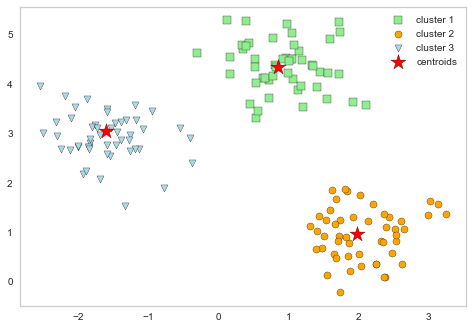

In [41]:
plt.scatter(
    x[y_pred_1 == 0, 0], x[y_pred_1 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_pred_1 == 1, 0], x[y_pred_1 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    x[y_pred_1 == 2, 0], x[y_pred_1 == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#! 画出聚类中心
plt.scatter(
    mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()